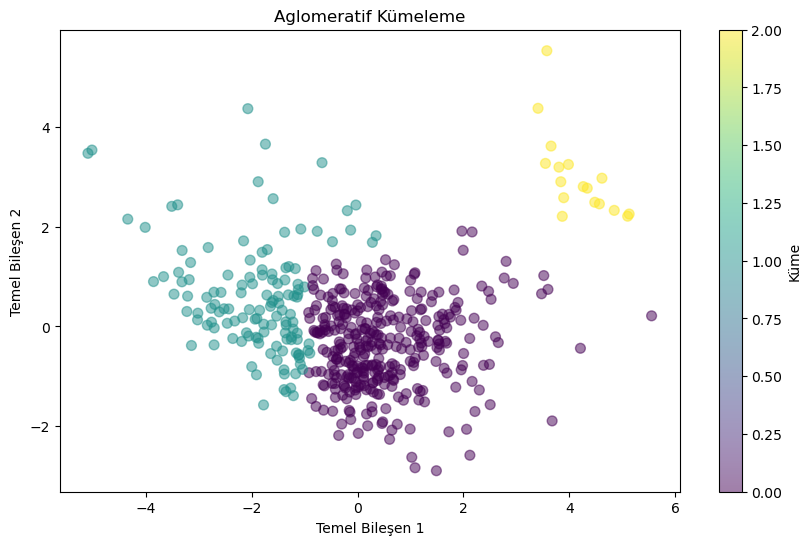

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veriyi yükle
data = pd.read_excel(r'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

# İstasyon Kodu sütununu koruyarak veriyi sıralı şekilde indirge
istasyon_kodu = data['İstasyon Kodu']  # İstasyon Kodu sütununu al
data_cleaned = data.drop(columns=['İstasyon Kodu'])  # İstasyon Kodu sütununu veriden çıkar
scaler = StandardScaler()  # Ölçeklendirici oluştur
data_scaled = scaler.fit_transform(data_cleaned)  # Veriyi ölçeklendir
pca = PCA(n_components=2)  # PCA nesnesi oluştur
data_pca = pca.fit_transform(data_scaled)  # Temel bileşen analizini uygula

# Aglomeratif kümeleme modelini uygula
agg_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_clustering.fit_predict(data_pca)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Aglomeratif Kümeleme')
plt.xlabel('Temel Bileşen 1')
plt.ylabel('Temel Bileşen 2')
plt.colorbar(label='Küme')
plt.show()
